<a href="https://colab.research.google.com/github/thaituongan/Project_ML/blob/main/M%C3%94_H%C3%8CNH_KHAI_PH%C3%81_%C3%9D_KI%E1%BA%BEN_%E2%80%8B%E2%80%8BV%C3%80_PH%C3%82N_T%C3%8DCH_C%E1%BA%A2M_X%C3%9AC_T%E1%BB%AA_B%C3%8CNH_LU%E1%BA%ACN_C%E1%BB%A6A_KH%C3%81CH_H%C3%80NG_TH%C6%AF%C6%A0NG_M%E1%BA%A0I_%C4%90I%E1%BB%86N_T%E1%BB%AC_B%E1%BA%B0NG_PH%C6%AF%C6%A0NG_PH%C3%81P_H%E1%BB%8CC_M%C3%81Y_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CÀI ĐẶT THƯ VIỆN**

In [ ]:
import pandas as pd
import numpy as np

import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

**CHUẨN BỊ DỮ LIỆU**

In [ ]:
# Tải dữ liệu
url = 'https://raw.githubusercontent.com/laxmimerit/Amazon-Musical-Reviews-Rating-Dataset/master/Musical_instruments_reviews.csv'
df = pd.read_csv(url)

#hien thi thông tin của dữ liệu
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**CÁC BIỂU ĐỒ CHO THẤY SỰ PHÂN BỐ CỦA DỮ LIỆU**

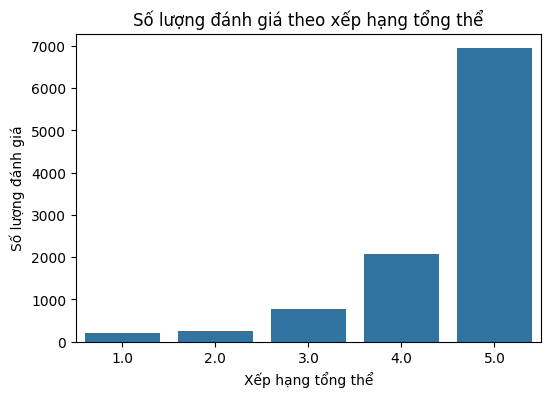

In [ ]:
#hiển thị phân bố dữ liệu của cột overall
plt.figure(figsize=(6, 4))
sns.countplot(x='overall', data=df)
plt.title('Số lượng đánh giá theo xếp hạng tổng thể')
plt.xlabel('Xếp hạng tổng thể')
plt.ylabel('Số lượng đánh giá')
plt.show()

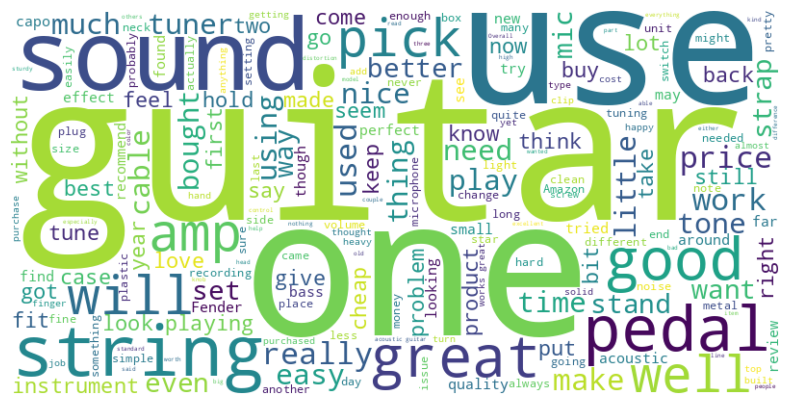

In [ ]:
#hiển thị phân bố dữ liệu của cột reviewText
#gộp các bình luận vào thành một chuỗi
review_text = " ".join(df['reviewText'].dropna().astype(str))

#word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

#hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

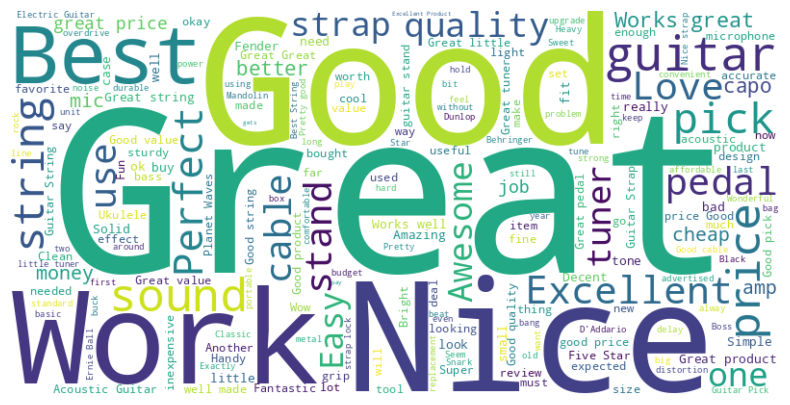

In [ ]:
#hiển thị phân bố dữ liệu của cột sumary
#gộp các tóm tắt vào thành một chuỗi
summary_text = " ".join(df['summary'].dropna().astype(str))

#word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

#hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

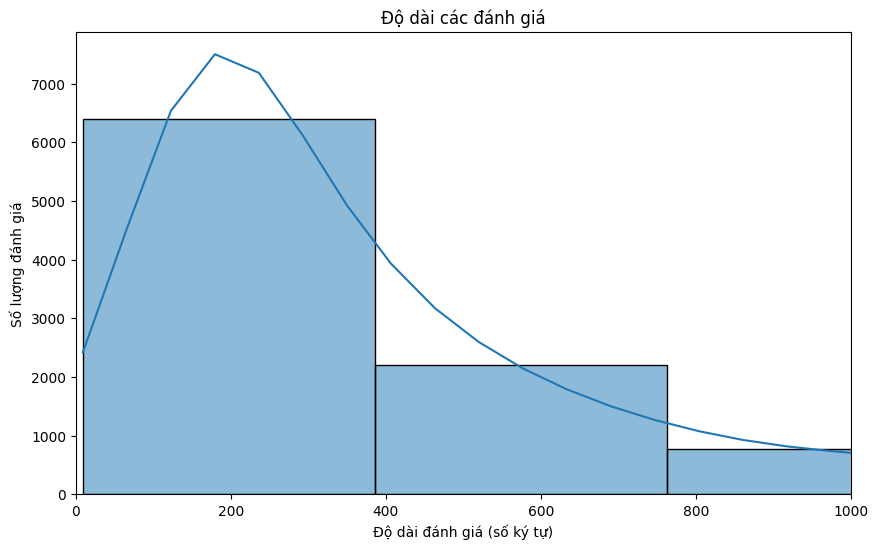

In [ ]:
# Loại bỏ các hàng chứa giá trị thiếu trong cột reviewText
df_temp = df.dropna(subset=['reviewText'])

# Tính độ dài các đánh giá
df_temp['review_length'] = df_temp['reviewText'].apply(len)

# Biểu đồ tần suất của độ dài các đánh giá
plt.figure(figsize=(10, 6))
sns.histplot(df_temp['review_length'], bins=30, kde=True)
plt.title('Độ dài các đánh giá')
plt.xlabel('Độ dài đánh giá (số ký tự)')
plt.ylabel('Số lượng đánh giá')
plt.xlim(0, 1000)
plt.show()

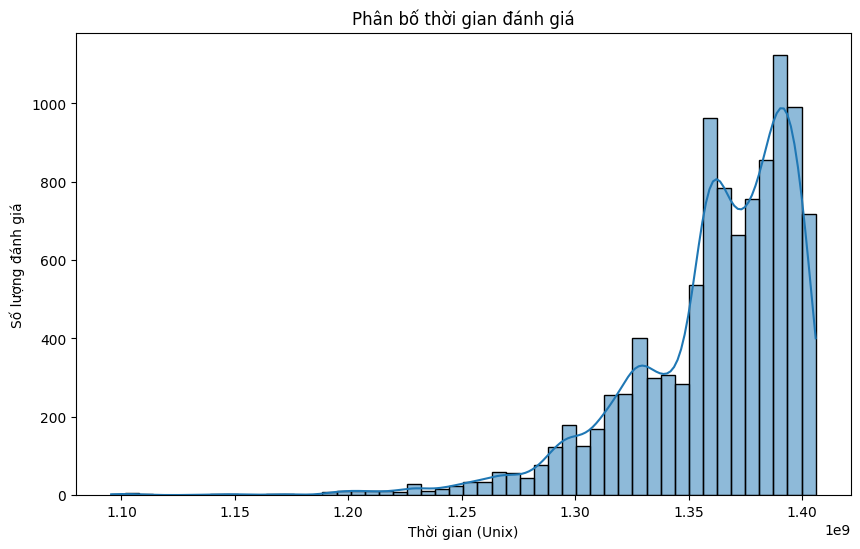

In [ ]:
# Biểu đồ phân bố thời gian đánh giá
plt.figure(figsize=(10, 6))
sns.histplot(df['unixReviewTime'], bins=50, kde=True)
plt.title('Phân bố thời gian đánh giá')
plt.xlabel('Thời gian (Unix)')
plt.ylabel('Số lượng đánh giá')
plt.show()

**## TIỀN XỬ LÝ DỮ LIỆU**

**1: LOẠI BỎ CÁC CỘT KHÔNG CẦN THIẾT CHO MÔ HÌNH**



In [ ]:
#tạo data mới sau khi loại các cột không cần thiết
data = df.copy()
data.drop(['reviewerName', 'unixReviewTime', 'asin', 'reviewTime', 'helpful'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewerID  10261 non-null  object 
 1   reviewText  10254 non-null  object 
 2   overall     10261 non-null  float64
 3   summary     10261 non-null  object 
dtypes: float64(1), object(3)
memory usage: 320.8+ KB


**2: XỬ LÝ DỮ LIỆU BỊ THIẾU**

2.1. HIỂN THỊ GIÁ TRỊ BỊ THIẾU TRONG CỘT

Cột bị thiếu giá trị là cột reviewText

In [ ]:
#Hiển thị số giá trị bị thiếu của các cột
for col in data.columns:
  data_missing = data[col].isnull().sum()
  print(f"Cột {col}: {data_missing} giá trị bị thiếu")

Cột reviewerID: 0 giá trị bị thiếu
Cột reviewText: 7 giá trị bị thiếu
Cột overall: 0 giá trị bị thiếu
Cột summary: 0 giá trị bị thiếu


In [ ]:
#in ra các hàng bị thiếu trong cột reviewText
missing_data_row = data[data['reviewText'].isnull()]
print(missing_data_row)

          reviewerID reviewText  overall  \
2927   AF7AQHLX1UV1Z        NaN      5.0   
4401   AU3GYRAKBUAEU        NaN      4.0   
8739  A3N93PUHEMQU34        NaN      5.0   
9175   AMEZJVXMSEPY0        NaN      5.0   
9306  A3ABAA36CZVYNX        NaN      5.0   
9313  A3OEBPVLF35YQL        NaN      5.0   
9342  A3OA4DV4L81N1D        NaN      5.0   

                                            summary  
2927                    The Pop Rocks with the Yeti  
4401                                great foot rest  
8739                   To make you sound like a pro  
9175                        Mini tech for musicians  
9306      No power = No Sound, But It Sounds GREAT!  
9313  This would be a must-have at twice the price.  
9342        Great sound and features for the price!  


2.2. NỐI CỘT REVIEW VÀ SUMMARY THÀNH CỘT REVIEWS

nối 2 cột review và sumary lại thành cột reviews để dễ xử lí và đồng thời giải quyết vấn đề missing dữ liệu ở cột reviewText

In [ ]:
data['reviews']=data['reviewText']+data['summary']
data=data.drop(['reviewText', 'summary'], axis=1)
data.head()


,reviewerID,overall,reviews
0,A2IBPI20UZIR0U,5.0,"Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,5.0,The product does exactly as it should and is q...
2,A195EZSQDW3E21,5.0,The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,5.0,Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,5.0,This pop filter is great. It looks and perform...


**3:TẠO CỘT SENTIMENT DỰA VÀO CỘT OVERALL**

In [ ]:
def f(row):
    #số sao nhỏ hơn 3 là negative
    if row['overall'] < 3.0:
        val = 'Negative'
    else:
    #số sao >= hơn 3 là postitive
        val = 'Positive'
    return val

data['sentiment'] = data.apply(f, axis=1)
data.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,"Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,5.0,The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,5.0,The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,5.0,Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,5.0,This pop filter is great. It looks and perform...,Positive


In [ ]:
#in ra số lượng của hai nhãn
data['sentiment'].value_counts()

sentiment
Positive    9794
Negative     467
Name: count, dtype: int64

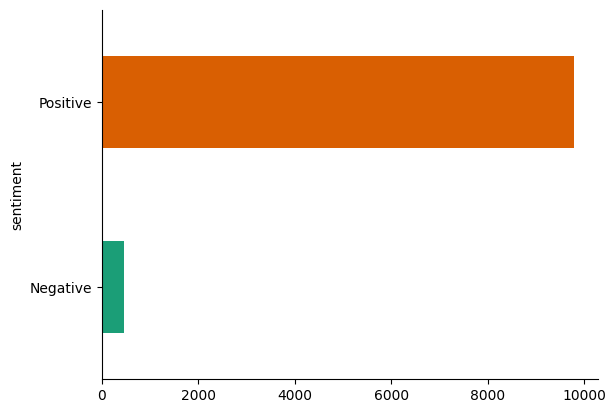

In [ ]:
#in ra biểu đồ cho thấy rõ sự phân bố
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**4: LÀM SẠCH DỮ LIỆU TRONG CỘT REVIEWS**

LOẠI BỎ CÁC KÝ TỰ KHÔNG MANG Ý NGHĨA

In [ ]:
def review_cleaning(text):
    text = str(text).lower()
    #loại bỏ kí tự trong ngoặc vuông
    text = re.sub('\[.*?\]', '', text)
    #loại bỏ các dấu câu
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #lại bỏ xuống dòng
    text = re.sub('\n', '', text)
    #loại bỏ các kí tự chứa số (vd dụ như mã sản phẩm,...)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
#áp dụng những phần loại bỏ vào cột reviews
data['reviews']=data['reviews'].apply(lambda x:review_cleaning(x))
data.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,not much to write about here but it does exact...,Positive
1,A14VAT5EAX3D9S,5.0,the product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,5.0,the primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,5.0,nice windscreen protects my mxl mic and preven...,Positive
4,A94QU4C90B1AX,5.0,this pop filter is great it looks and performs...,Positive


XỬ LÍ CÁC TỪ KHÔNG MANG NHIỀU Ý NGHĨA

In [ ]:
#Định nghĩa các từ không mang ý nghĩa cảm xúc dựa trên bảng phân bố dữ liệu của reviewText
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 'we',
             'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other', 'and', 'an', 'during',
             'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 'what', 'while', 'have', 're', 'more',
             'only', "needn't", 'when', 'just', 'that', 'were', 'very', 'should', 'any', 'isn', 'who',  'a', 'they',
             'to', 'too', 'has', 'before', 'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by',
             'am', 'from', 'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such', 'his',
             'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 'me', 'why', 'once',  'him', 'than',
             'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it', 'at', 'after', 'its', 'which', 'there', 'our', 'this', 'hers',
             'being', 'did', 'of', 'had', 'under', 'over', 'again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all', "guitar",
             "string", "sound", "amp", "pedal", "cable", 'but', 'even', 'if', 'but', 'strings', 'im', 'ive', 'also', 'store', 'local']
#tiếp tục áp dụng việc loại bỏ các từ dừng vào cột reviews
data['reviews'] = data['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,not much write exactly supposed filters pop so...,Positive
1,A14VAT5EAX3D9S,5.0,product exactly quite affordablei not realized...,Positive
2,A195EZSQDW3E21,5.0,primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,5.0,nice windscreen protects mxl mic prevents pops...,Positive
4,A94QU4C90B1AX,5.0,pop filter great looks performs like studio fi...,Positive


N-GRAM

In [ ]:
#lọc các đánh giá dựa trên cột sentiment
review_pos = data[data["sentiment"]=='Positive']
review_neg = data[data["sentiment"]=='Negative']

#hàm tạo N-gram
def generate_ngrams(text, n_gram):
    token = [token for token in text.split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

#hàm tạo biểu đồ
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

Monogram

In [ ]:
#đếm số lần xuất hiện của từng từ trong các đánh giá tích cực
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted.head(25), 'green')

#đếm số lần xuất hiện của từng từ trong các đánh giá tiêu cực
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted.head(25), 'red')

#tạo biểu đồ tổng hợp
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.2,
                          subplot_titles=["Trong Các Đánh Giá Tích Cực",
                                          "Trong Các Đánh Giá Tiêu Cực"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neg, 2, 1)
fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)', title="BIỂU ĐỒ TUẦN SUẤT XUẤT HIỆN CỦA TỪNG TỪ")
iplot(fig, filename='word-plots')

Bigram

In [ ]:
#đếm số lần xuất hiện của từng từ trong các đánh giá tích cực
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted.head(25), 'green')

#đếm số lần xuất hiện của từng từ trong các đánh giá tiêu cực
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted.head(25), 'red')

#tạo biểu đồ tổng hợp
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.2,
                          subplot_titles=["Trong Các Đánh Giá Tích Cực",
                                          "Trong Các Đánh Giá Tiêu Cực"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neg, 2, 1)
fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)', title="BIỂU ĐỒ TUẦN SUẤT XUẤT HIỆN CỦA TỪNG TỪ")
iplot(fig, filename='word-plots')

Trigram

In [ ]:
#đếm số lần xuất hiện của từng từ trong các đánh giá tích cực
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted.head(25), 'green')

#đếm số lần xuất hiện của từng từ trong các đánh giá tiêu cực
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted.head(25), 'red')

#tạo biểu đồ tổng hợp
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.2,
                          subplot_titles=["Trong Các Đánh Giá Tích Cực",
                                          "Trong Các Đánh Giá Tiêu Cực"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neg, 2, 1)
fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)', title="BIỂU ĐỒ TUẦN SUẤT XUẤT HIỆN CỦA TỪNG TỪ")
iplot(fig, filename='word-plots')

MÃ HÓA BIẾN MỤC TIÊU

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Mã hóa nhãn cho cột 'sentiment'
# positive = 1, negative = 0
data['sentiment']= label_encoder.fit_transform(data['sentiment'])
data['sentiment'].unique()
# in ra số lượng
data['sentiment'].value_counts()

sentiment
1    9794
0     467
Name: count, dtype: int64

CHUYỂN VĂN BẢN VỀ TỪ GỐC

In [ ]:
# Hàm xử lý văn bản
corpus = []
def preprocess_text(text):
    ps = PorterStemmer()
    words = text.split()
   # words = [word for word in words]
    words = [ps.stem(word) for word in words]
    #gộp các từ trong words thành một chuỗi dùng khoảng trắng làm dấu phân cách
    words = ' '.join(words)
    corpus.append(words)
    return words
# Áp dụng xử lý văn bản cho cột 'reviews'
data['reviews'] = data['reviews'].astype(str).apply(preprocess_text)

# Hiển thị vài dòng đầu của dữ liệu
data.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,not much write exactli suppos filter pop sound...,1
1,A14VAT5EAX3D9S,5.0,product exactli quit affordablei not realiz do...,1
2,A195EZSQDW3E21,5.0,primari job devic block breath would otherwis ...,1
3,A2C00NNG1ZQQG2,5.0,nice windscreen protect mxl mic prevent pop th...,1
4,A94QU4C90B1AX,5.0,pop filter great look perform like studio filt...,1


In [ ]:
#in thử một dòng sau khi chuyển về từ gốc
corpus[3]

'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sagginggood windscreen money'

DÙNG TF-IDF ĐỂ ĐO LƯỜNG MỨC ĐỘ QUAN TRỌNG CỦA MỘT TỪ
KẾT HỢP BIGRAM

In [ ]:
#kết hợp bigram và giới hạn số lượng bigarm là 2000 từ
tf_idf = TfidfVectorizer(max_features=2000, ngram_range=(2,2))
#
X = tf_idf.fit_transform(data['reviews'])

In [ ]:
#biểu diễn 10261 mẫu reviews và chọn ra 2000 bigram quan trọng nhất để biểu diễn cho mỗi review đó
X.shape

(10261, 2000)

In [ ]:
#lấy ra biến mục tiêu
y = data['sentiment']

XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU

Dùng SMOTE

In [ ]:
#in ra số lượng của nhãn ở dữ liệu ban đầu
print(f'Ban đầu: {Counter(y)}')
#Dùng SMOTE để nhân bản lên nhãn negative để xử lý mất cân bằng
smote = SMOTE(random_state=42)
#gáng cho biến X_res và y_res sau khi nhân bảng
X_res, y_res = smote.fit_resample(X, y)
print(f'Sau khi cân bằng: {Counter(y_res)}')

Ban đầu: Counter({1: 9794, 0: 467})
Sau khi cân bằng: Counter({1: 9794, 0: 9794})


**## CHIA TẬP TRAIN VÀ TEST**

In [ ]:
#chia tập dữ liệu thành train và test thành 70 train và 30 test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

**## ĐIỀU CHỈNH CÁC SIÊU THAM SỐ**

Điều chỉnh siêu tham số cho thuật toán SVM

In [ ]:
#định nghĩa param_grid SVM cho GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svc = SVC()
#dùng GridSearchCV
grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svm)
grid_svc.fit(X_train, y_train)
grid_svc.predict(X_test)
print("Bo sieu tham so tot nhat:", grid_svc.best_params_)

Bo sieu tham so tot nhat: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [ ]:
#train cho SVM với bộ siêu tham số tốt nhất
best_model_svm = grid_svc.best_estimator_
# Dự đoán trên tập kiểm tra
svm_y_pred = best_model_svm.predict(X_test)

In [ ]:
#so sánh kết quả giữa y thực tế và y_pred
pd.DataFrame({'y': y_test, 'y_pred': svm_y_pred})

,y,y_pred
10059,1,1
5928,1,1
15146,0,0
2140,1,0
14946,0,0
...,...,...
4256,1,1
5280,1,1
12114,0,0
14446,0,0


In [ ]:
#Đánh giá mô hình dựa trên các tiêu chí accuracy, f1_score
accuracy = accuracy_score(y_test, svm_y_pred)
f1 = f1_score(y_test, svm_y_pred, average='weighted')
print("Accuracy dựa trên mô hình SVM: ", accuracy)
print("f1: ", f1)

Accuracy dựa trên mô hình SVM:  0.9715841415688277
f1:  0.9715744462649737


Điều chỉnh siêu tham số cho thuật toán KNN

In [ ]:
#định nghĩa param_grid KNN cho GridSearchCV
# n_neighbors: số điểm k lân cận
# weights:
param_grid_knn = {
    'n_neighbors' : [3,5,7,9,11,13],
    'weights' : ['uniform','distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
kNN = KNeighborsClassifier()
#tạo grid cho bộ siêu tham số, chia thành 5 tập phần bằng nhau
grid_knn = GridSearchCV(estimator=kNN, param_grid=param_grid_knn, cv=5)
#dùng tập huấn luyện train để tìm ra bộ siêu tham số tốt nhất
grid_knn.fit(X_train, y_train)
#in ra được bộ siêu tham số tốt nhất cho grid_knn
print("Bo sieu tham so tot nhat:", grid_knn.best_params_)

Bo sieu tham so tot nhat: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Đánh giá model knn tốt nhất trên tập test

In [ ]:
#lấy ra mô hình tốt nhất
knn_best_model = grid_knn.best_estimator_
#đánh giá mô hình trên tập test
knn_y_preds = knn_best_model.predict(X_test)

In [ ]:
#DataFrame cho thấy rõ bảng so sánh kết quả giữa y thực tế và y dự đoán
pd.DataFrame({'y': y_test,'y_pred ': knn_y_preds})

,y,y_pred
10059,1,1
5928,1,1
15146,0,0
2140,1,1
14946,0,0
...,...,...
4256,1,1
5280,1,1
12114,0,1
14446,0,0


In [ ]:
#Đánh giá mô hình dựa trên các tiêu chí accuracy, f1_score
accuracy = accuracy_score(y_test, knn_y_preds)
f1 = f1_score(y_test, knn_y_preds, average='weighted')
print("Accuracy dựa trên mô hình KNN: ", accuracy)
print("f1: ", f1)

Accuracy dựa trên mô hình KNN:  0.8728943338437979
f1:  0.8728951803067857


Điều chỉnh siêu tham số cho thuật toán Naive Bayes

In [ ]:
#định nghĩa param_grid cho GridSearchCV
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
naive_bayes = MultinomialNB()
grid_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, cv=5, verbose=1, n_jobs=-1)
#huấn luyện GridSearchCV
grid_nb.fit(X_train, y_train)
grid_nb.predict(X_test)
print("Bo sieu tham so tot nhat:", grid_nb.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Bo sieu tham so tot nhat: {'alpha': 0.1, 'fit_prior': True}


In [ ]:
# Sử dụng mô hình tốt nhất đã được huấn luyện bởi GridSearchCV
best_model = grid_nb.best_estimator_
# Dự đoán trên tập kiểm tra
nb_y_pred = best_model.predict(X_test)

In [ ]:
#so sánh giữa y thực tế và y dự đoán
pd.DataFrame({'y': y_test,'y_pred ': nb_y_pred})

,y,y_pred
10059,1,1
5928,1,1
15146,0,0
2140,1,0
14946,0,1
...,...,...
4256,1,1
5280,1,1
12114,0,0
14446,0,0


In [ ]:
#Đánh giá mô hình dựa trên các tiêu chí accuracy, f1_score
accuracy = accuracy_score(y_test, nb_y_pred)
f1 = f1_score(y_test, nb_y_pred, average='weighted')
print("Accuracy dựa trên mô hình Naive Bayes: ", accuracy)
print("f1: ", f1)

Accuracy dựa trên mô hình Naive Bayes:  0.9001191083886336
f1:  0.8998287586534087


**Mô hình BERT**

In [ ]:
data_text = data.copy()
X_bert = (data['reviews'])
y_bert = data['sentiment']
data_text.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,"Not much to write about here, but it does exac...",1
1,A14VAT5EAX3D9S,5.0,The product does exactly as it should and is q...,1
2,A195EZSQDW3E21,5.0,The primary job of this device is to block the...,1
3,A2C00NNG1ZQQG2,5.0,Nice windscreen protects my MXL mic and preven...,1
4,A94QU4C90B1AX,5.0,This pop filter is great. It looks and perform...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_bert = data_text['reviews'].astype(str).tolist()  # Ensure the reviews are strings
y_bert = data_text['sentiment'].tolist()

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_bert, test_size=0.2, random_state=42)

# Tải tokenizer và BERT model từ thư viện transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Token hóa và mã hóa dữ liệu
def encode_reviews(reviews):
    return tokenizer.batch_encode_plus(
        reviews,
        max_length=128,
        padding='max_length',
        truncation=True
    )

X_train_enc = encode_reviews(X_train)
X_test_enc = encode_reviews(X_test)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_data = TensorDataset(torch.tensor(X_train_enc['input_ids']), torch.tensor(X_train_enc['attention_mask']), torch.tensor(y_train))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

test_data = TensorDataset(torch.tensor(X_test_enc['input_ids']), torch.tensor(X_test_enc['attention_mask']), torch.tensor(y_test))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)


**Huyến luyện mô hình với tốc độ học là 1e-5**

In [ ]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Sử dụng AdamW optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Định nghĩa hàm huấn luyện
def train_model(model, train_dataloader):
    model.train()
    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_mask, batch_labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        if step % 10 == 0:
            print(f"Loss at step {step}: {loss.item()}")

# Huấn luyện mô hình
train_model(model, train_dataloader)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loss at step 0: 0.9178760051727295
Loss at step 10: 0.3965308368206024
Loss at step 20: 0.3861430287361145
Loss at step 30: 0.15973016619682312
Loss at step 40: 0.29542723298072815
Loss at step 50: 0.0463358610868454
Loss at step 60: 0.043639134615659714
Loss at step 70: 0.15008622407913208
Loss at step 80: 0.2357117086648941
Loss at step 90: 0.40569689869880676
Loss at step 100: 0.3155874013900757
Loss at step 110: 0.22907324135303497
Loss at step 120: 0.24240273237228394
Loss at step 130: 0.38120630383491516
Loss at step 140: 0.21295222640037537
Loss at step 150: 0.07566289603710175
Loss at step 160: 0.03759589046239853
Loss at step 170: 0.05367900803685188
Loss at step 180: 0.12303587049245834
Loss at step 190: 0.11838331073522568
Loss at step 200: 0.3069915175437927
Loss at step 210: 0.10388603061437607
Loss at step 220: 0.290974497795105
Loss at step 230: 0.18009574711322784
Loss at step 240: 0.05200301855802536
Loss at step 250: 0.19330744445323944


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def evaluate_model(model, test_dataloader):
    model.eval()
    predictions, true_labels = [], []

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = batch

        with torch.no_grad():
            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)

        logits = outputs.logits
        predictions.append(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.append(batch_labels.cpu().numpy())

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")

# danh gia mo hinh
evaluate_model(model, test_dataloader)

Accuracy: 0.9493
F1 Score: 0.9247
Recall: 0.9493
Precision: 0.9013


**Huyến luyện mô hình với tốc độ học là 2e-5**

In [ ]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Sử dụng AdamW optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Định nghĩa hàm huấn luyện
def train_model(model, train_dataloader):
    model.train()
    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_mask, batch_labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        if step % 10 == 0:
            print(f"Loss at step {step}: {loss.item()}")

# Huấn luyện mô hình
train_model(model, train_dataloader)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loss at step 0: 0.5968640446662903
Loss at step 10: 0.18107353150844574
Loss at step 20: 0.036332860589027405
Loss at step 30: 0.23688867688179016
Loss at step 40: 0.32077378034591675
Loss at step 50: 0.23781444132328033
Loss at step 60: 0.03219582512974739
Loss at step 70: 0.14897410571575165
Loss at step 80: 0.1254275143146515
Loss at step 90: 0.1969623863697052
Loss at step 100: 0.036367759108543396
Loss at step 110: 0.2936008870601654
Loss at step 120: 0.10610169172286987
Loss at step 130: 0.2711883783340454
Loss at step 140: 0.26192212104797363
Loss at step 150: 0.025405164808034897
Loss at step 160: 0.2233751118183136
Loss at step 170: 0.20702116191387177
Loss at step 180: 0.178063303232193
Loss at step 190: 0.054776180535554886
Loss at step 200: 0.14982640743255615
Loss at step 210: 0.21796125173568726
Loss at step 220: 0.16837137937545776
Loss at step 230: 0.2915481626987457
Loss at step 240: 0.2024492621421814
Loss at step 250: 0.01969890296459198


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def evaluate_model(model, test_dataloader):
    model.eval()
    predictions, true_labels = [], []

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = batch

        with torch.no_grad():
            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)

        logits = outputs.logits
        predictions.append(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.append(batch_labels.cpu().numpy())

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")

# danh gia mo hinh
evaluate_model(model, test_dataloader)


Accuracy: 0.9493
F1 Score: 0.9247
Recall: 0.9493
Precision: 0.9013
